Practice from edX course: UCSanDiegoX: DSE200x

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv("\\weather\\minute_weather.csv")
data.shape

(1587257, 13)

In [3]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [5]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [6]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [7]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [8]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [9]:
sampled_df = sampled_df.dropna()

In [10]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4


We now select the features that we are interested in.

In [11]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
select_df = sampled_df[features]
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [12]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


Use the standardscaler class to convert each column's data to z-scores(i.e it is done columnwise). Thus, for each column in select_df, the values are replaced by their z-scores with mean, sd = column mean, sd.

In [14]:
x = StandardScaler().fit_transform(select_df)
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

Here we are applying k means algorithim to our data. The data is divided into 12 disjoint clusters. Each point gets assigned to the cluster with smallest squared Euclidean distance from the point to the cluster's mean(centroid). Then, new means are calculated and the process is done again until assignments no longer change. 

In [15]:
kmeans = KMeans(n_clusters = 12)
model = kmeans.fit(x)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [16]:
centers = model.cluster_centers_

This will give the means of the points in the 12 clusters.

In [17]:
centers

array([[-0.21151325,  0.63115365,  0.4085257 ,  0.73519654,  0.51664359,
         0.67317085, -0.14970739],
       [ 0.06081934, -0.78832578, -1.19691724, -0.57090652, -1.04284176,
        -0.58542927,  0.87817964],
       [-0.84006003, -1.19826143,  0.37512392,  0.35405971,  0.47359931,
         0.34196259,  1.36261431],
       [ 0.13149639,  0.84392184,  1.41066429, -0.63849168,  1.67466614,
        -0.58923014, -0.71419508],
       [ 1.19010134, -0.2544877 , -1.15492416,  2.12206287, -1.05342976,
         2.23876646, -1.13464887],
       [-1.17926552, -0.87664975,  0.44651149,  1.9762164 ,  0.53853724,
         1.93767623,  0.91484771],
       [ 0.25289768, -0.99430211,  0.65990956, -0.54752121,  0.85133408,
        -0.5301358 ,  1.15778574],
       [ 1.36640063, -0.08086732, -1.20745822, -0.0513879 , -1.07623433,
        -0.03116097, -0.977592  ],
       [ 0.2339313 ,  0.31909585,  1.88794143, -0.65198177, -1.55164369,
        -0.57681439, -0.28251551],
       [-0.16446256,  0.8639

Here we create a pandas dataframe that contains all cluster means along with a column that numbers the cluster.

In [18]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z, columns = colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.211513,0.631154,0.408526,0.735197,0.516644,0.673171,-0.149707,0
1,0.060819,-0.788326,-1.196917,-0.570907,-1.042842,-0.585429,0.878180,1
2,-0.840060,-1.198261,0.375124,0.354060,0.473599,0.341963,1.362614,2
3,0.131496,0.843922,1.410664,-0.638492,1.674666,-0.589230,-0.714195,3
4,1.190101,-0.254488,-1.154924,2.122063,-1.053430,2.238766,-1.134649,4
5,-1.179266,-0.876650,0.446511,1.976216,0.538537,1.937676,0.914848,5
6,0.252898,-0.994302,0.659910,-0.547521,0.851334,-0.530136,1.157786,6
7,1.366401,-0.080867,-1.207458,-0.051388,-1.076234,-0.031161,-0.977592,7
8,0.233931,0.319096,1.887941,-0.651982,-1.551644,-0.576814,-0.282516,8
9,-0.164463,0.863957,-1.310920,-0.589771,-1.166636,-0.605081,-0.640777,9


In [19]:
P.shape

(12, 8)

In [22]:
def parallel_plot(data):
    colors = list(islice(cycle(['b', 'r', 'g', 'y','k']), None, len(data)))
    plt.figure(figsize = (15,8)).gca().axes.set_ylim([-3,3])
    parallel_coordinates(data, 'prediction', color = colors, marker = 'o')

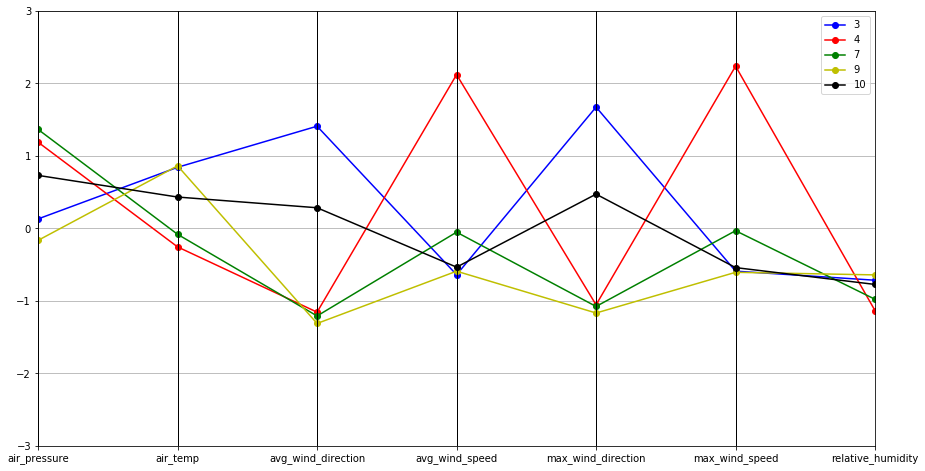

In [23]:
parallel_plot(P[P['relative_humidity'] < -0.5])

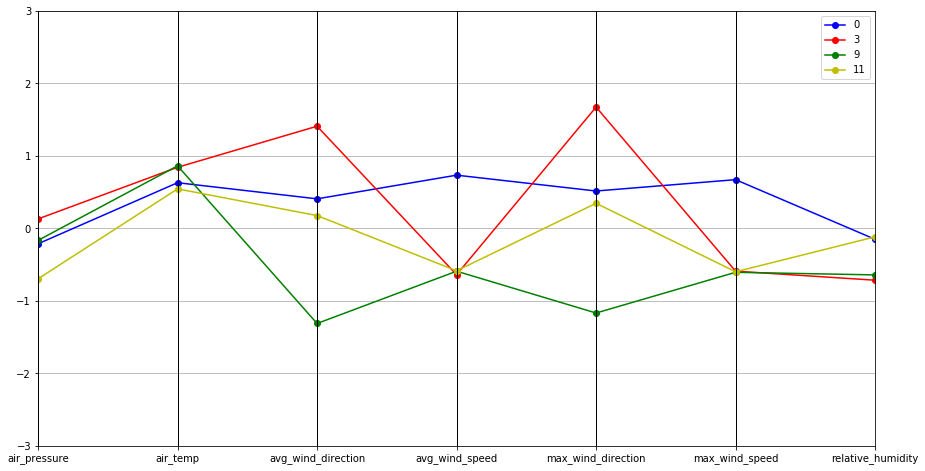

In [24]:
parallel_plot(P[P['air_temp'] > 0.5])

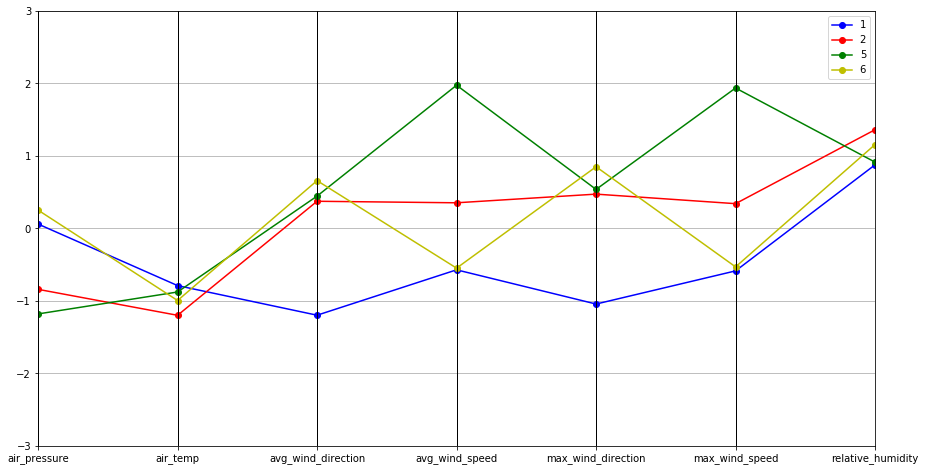

In [25]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])